# Topic analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample documents
documents = [
    "Data science is an exciting field.",
    "Machine learning is a subset of data science.",
    "Deep learning is a part of machine learning."
]

## 1. Frequency analysis or Term frequency

Count the most common tokens (excluding stop words) to decide the topic of a corpus (a text body).<br>
The tokens could be arranged as uni-gram, bi-gram, tri-gram, or multi-gram (rare).<br>

<b>Best For: Simple keyword analysis</b>

In [2]:
# Term freuqency (raw count)
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(documents)
tf_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
tf_df.index = [f"Doc {i+1}" for i in range(len(documents))]

print("Term Frequency (Raw Count):\n", tf_df)

Term Frequency (Raw Count):
        data  deep  exciting  field  learning  machine  science  subset
Doc 1     1     0         1      1         0        0        1       0
Doc 2     1     0         0      0         1        1        1       1
Doc 3     0     1         0      0         2        1        0       0


## 2. TF-IDF (Term Frequency - Inverse Document Frequency)

To differentiate multiple documents that have a similar topic, the most common unique tokens<br> should be taken instead.
Using this technique, a high degree of relevance is assumed for words that<br> appear frequently in a particular document, but relatively infrequently across a wide range of other<br> documents.<br>

<b>Best For: More accurate text differentiation</b>

In [3]:
# Term frequency-inverse document frequency
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.index = [f"Doc {i+1}" for i in range(len(documents))]

print("\nTerm Frequency-Inverse Document Frequency:\n", tfidf_df)


Term Frequency-Inverse Document Frequency:
            data     deep  exciting     field  learning   machine   science  \
Doc 1  0.428046  0.00000  0.562829  0.562829  0.000000  0.000000  0.428046   
Doc 2  0.417796  0.00000  0.000000  0.000000  0.417796  0.417796  0.417796   
Doc 3  0.000000  0.50689  0.000000  0.000000  0.771006  0.385503  0.000000   

         subset  
Doc 1  0.000000  
Doc 2  0.549351  
Doc 3  0.000000  


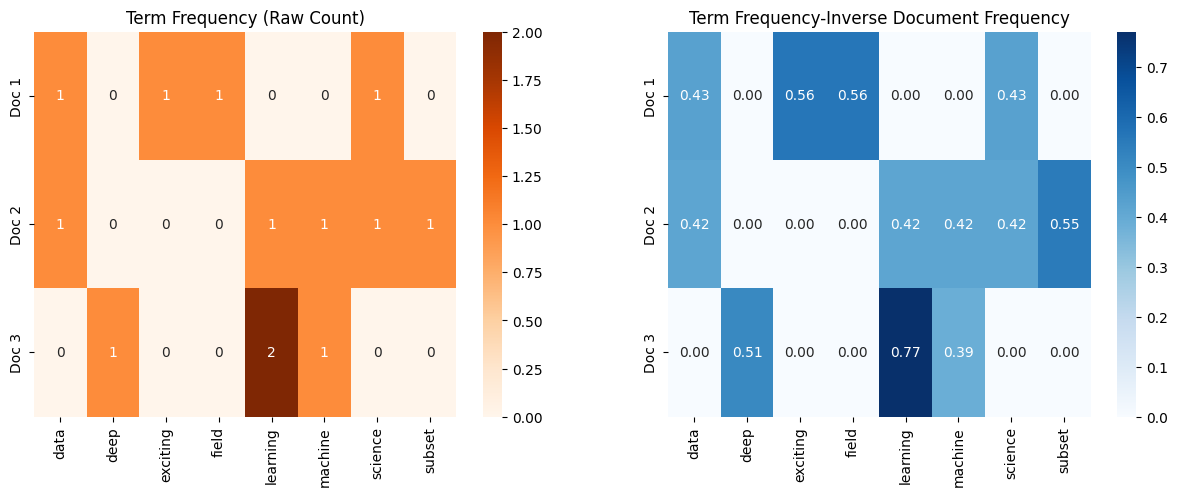

In [4]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap of term frequency (raw count)
sns.heatmap(tf_df, annot=True, cmap="Oranges", fmt=".0f", ax=axes[0])
axes[0].set_title("Term Frequency (Raw Count)")

# Heatmap of term frequency-inverse document frequency
sns.heatmap(tfidf_df, annot=True, cmap="Blues", fmt=".2f", ax=axes[1])
axes[1].set_title("Term Frequency-Inverse Document Frequency")

plt.show()

With TF-IDF, the unique topics for documents
1. Doc 1: exciting, field
2. Doc 2: subset, data, learning, machine, science
3. Doc 3: learning, deep